<h1>Anusha Garg <br>
16121 <br>
B.Sc.(H) Computer Science <br>
MACHINE LEARNING PRACTICALS 2025 </h1>

<h1> Importing Libraries </h1

In [ ]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, datasets
from sklearn import linear_model
from sklearn.metrics import r2_score,accuracy_score

<h1> 1. Linear Regression </h1>

**without splitting the data**

In [ ]:
df=read_csv(r"/content/drive/MyDrive/ML Datasets/house2 - Sheet1.csv")
X=df.iloc[:,0].values.reshape(-1,1)
Y=df.iloc[:,1].values.reshape(-1,1)
reg=linear_model.LinearRegression()
reg.fit(X,Y)

LinearRegression()

In [ ]:
print("Reg Intercept= ",reg.intercept_)
print("Reg Coefficient= ",reg.coef_)
y=100*reg.coef_+reg.intercept_
print("The predicted cost is: ",y)
print(reg.predict([[100]]))
print("The score is: ", reg.score(X,Y))

Reg Intercept=  [1870.18255578]
Reg Coefficient=  [[109.85801217]]
The predicted cost is:  [[12855.98377282]]
[[12855.98377282]]
The score is:  0.9943031315421245


In [ ]:
"""plt.scatter(X,Y)
plt.xlabel('Area')
plt.ylabel('Cost')
plt.title('Area vs Cost')"""

"plt.scatter(X,Y)\nplt.xlabel('Area')\nplt.ylabel('Cost')\nplt.title('Area vs Cost')"

<h1>2. Multivariate Regression</h1>

 **Now with splitting the data**

In [ ]:
df2=pd.read_csv(r"/content/drive/MyDrive/ML Datasets/Salary_Data - Salary_Data.csv")

In [ ]:
x=df2.iloc[:,0:2]
y=df2.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)
pred=regressor.predict(x_test)
#print(pred)
#print(y_test)
print("Testing r2 score", r2_score(y_test,pred))
print("Training r2 score",r2_score(y_train,regressor.predict(x_train)))

Testing r2 score 0.9993411647000848
Training r2 score 0.9769628316227651


In [ ]:
x=np.array([[1,100,3],[1,300,7],[1,500,4]])
y=np.array([300,700,600])
xt=x.T
xtx=xt@x
xinv=np.linalg.inv(xtx)
xty=xt@y
b=xinv@xty
b

array([28.57142857,  0.57142857, 71.42857143])

<h1>3. Linear Regression using Gradient Descent </h1>

In [ ]:
x1=np.array([1,2,3,4,5])
y1=np.array([2,2.5,3.5,4.0,4.5])
w0=0.5
w1=0.5
loss_history=[]
epochs=100
m=len(x1)
learning_rate=0.1
for i in range(epochs):
  y1_pred=w0+w1*x1
  dw0=-(1/m)*np.sum(y1-y1_pred)
  dw1=-(1/m)*np.sum((y1-y1_pred)*x1)
  mse=np.mean((y1-y1_pred)**2)
  loss_history.append(mse)
  w0-=learning_rate*dw0
  w1-=learning_rate*dw1
  if i%10==0:
    print("\niteration : ",i, "\nw0= ",w0,"\nw1=",w1,"\ndw0= ",dw0,"\ndw1=",dw1,"\nMSE=",mse)


iteration :  0 
w0=  0.63 
w1= 0.92 
dw0=  -1.3 
dw1= -4.2 
MSE= 1.75

iteration :  10 
w0=  0.727552236672 
w1= 0.8224080524480001 
dw0=  -0.10703303712000008 
dw1= 0.029646241919999563 
MSE= 0.08796722245888719

iteration :  20 
w0=  0.825121696218344 
w1= 0.7953828736968516 
dw0=  -0.09025543369572149 
dw1= 0.024999307883173262 
MSE= 0.06688469103640012

iteration :  30 
w0=  0.9073970224143765 
w1= 0.7725939276296486 
dw0=  -0.07610778233581708 
dw1= 0.02108063531480764 
MSE= 0.05189356773117691

iteration :  40 
w0=  0.9767755890151039 
w1= 0.7533771771701402 
dw0=  -0.06417779290279882 
dw1= 0.01777621953985511 
MSE= 0.04123385265954499

iteration :  50 
w0=  1.0352789791092738 
w1= 0.7371726762189321 
dw0=  -0.05411784413452994 
dw1= 0.014989775042843068 
MSE= 0.0336540654017893

iteration :  60 
w0=  1.0846118901249755 
w1= 0.7235082509233548 
dw0=  -0.04563480483358209 
dw1= 0.012640109182454307 
MSE= 0.028264317694016765

iteration :  70 
w0=  1.126211806050628 
w1= 0.711985

<function matplotlib.pyplot.show(close=None, block=None)>

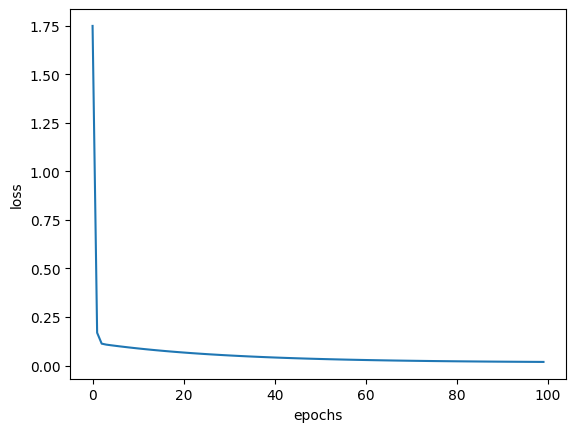

In [ ]:
plt.plot(loss_history)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show

<h1>4. Ridge and Lasso Regression</h1>

In [ ]:
from sklearn.linear_model import Ridge, Lasso
df3=pd.read_csv(r"/content/drive/MyDrive/ML Datasets/kc_house_data.csv")
df3.isnull().sum()
df3['sqft_above']=df3['sqft_above'].fillna(df3['sqft_above'].mean())
x=df3.iloc[:,3:]
y=df3.iloc[:,2]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
regressor=linear_model.LinearRegression()
regressor.fit(x_train,y_train)
pred=regressor.predict(x_test)
print("Testing score: r2 score ",r2_score(y_test,pred))

ridge_Model=Ridge(alpha=0.1)
ridge_Model.fit(x_train,y_train)
ridge_pred=ridge_Model.predict(x_test)
print("Testing score (Ridge): r2 score ",r2_score(y_test,ridge_pred))

lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
lasso_pred=lasso_model.predict(x_test)
print("Testing score (Lasso): r2 score ",r2_score(y_test,lasso_pred))
print("Ridgeo Model coefficient ",ridge_Model.coef_)
print("Lasso Model coefficient ",lasso_model.coef_)

Testing score: r2 score  0.7006785748663429
Testing score (Ridge): r2 score  0.7006708591636039
Testing score (Lasso): r2 score  0.7011928702735307
Ridgeo Model coefficient  [-3.43720312e+04  4.45534207e+04 -2.62021567e+03  8.86511786e-02
  7.01443801e+03  5.61874325e+05  5.36441160e+04  2.44957273e+04
  9.45666755e+04  2.79930585e+03  2.76838356e+03 -2.68152093e+03
  2.03988384e+01 -5.52468000e+02  5.95764662e+05 -1.94443439e+05
  2.11822477e+01 -3.26025291e-01]
Lasso Model coefficient  [-3.43348011e+04  4.45624414e+04  2.79380595e+02  8.88505105e-02
  7.00297589e+03  5.62396179e+05  5.36425162e+04  2.45273176e+04
  9.45689773e+04 -1.00339472e+02 -1.31373829e+02 -2.68077135e+03
  2.04161389e+01 -5.52225220e+02  5.95960555e+05 -1.94577806e+05
  2.12118560e+01 -3.25843332e-01]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.398e+14, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


<h1>5. Polynomial Regression </h1>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x2=df2.iloc[:,1:2]
y2=df2.iloc[:,2:3]
lin=linear_model.LinearRegression()
lin.fit(x2,y2)

poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x2)
poly.fit(x_poly,y2)
lin2=linear_model.LinearRegression()
lin2.fit(x_poly,y2)
pred=lin2.predict(x_poly)
print(pred)
r2=r2_score(y2,pred)
print("R2 score is: ",r2)

[[ 36419.97995933]
 [ 38279.7051688 ]
 [ 40140.74178358]
 [ 44799.07071874]
 [ 46664.69725209]
 [ 53204.7174356 ]
 [ 54140.31743855]
 [ 56012.50099842]
 [ 56012.50099842]
 [ 60698.69729633]
 [ 62575.47077478]
 [ 63514.34929099]
 [ 63514.34929099]
 [ 64453.55565853]
 [ 68213.65964195]
 [ 71979.00924659]
 [ 73863.65115687]
 [ 75749.60447246]
 [ 81415.33285105]
 [ 82360.76839379]
 [ 89936.05538347]
 [ 92782.19755149]
 [100386.33545789]
 [103243.29671968]
 [108011.45584918]
 [110876.2855428 ]
 [115657.55872536]
 [116614.79691585]
 [123324.64408643]
 [125244.69393997]]
R2 score is:  0.956975168321065


<h1>6. Logistic Regression </h1>

<h4> With Library </h4>

In [ ]:
df4=read_csv(r"/content/drive/MyDrive/ML Datasets/diabetes.csv")
X=df4.iloc[:,:-1]
y=df4.iloc[:,-1]
list1=['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)
for i in list1:
  reg=linear_model.LogisticRegression(max_iter=1000,random_state=0,solver=i, C=1,fit_intercept=True,tol=0.0001, intercept_scaling=1, class_weight=None,)
  reg.fit(X_train,y_train)
  y_pred=reg.predict(X_test)
  print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))
  print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred))
  #print(metrics.classification_report(y_test,y_pred))

Accuracy:  0.7760416666666666
Confusion Matrix: 
 [[109  14]
 [ 29  40]]
Accuracy:  0.78125
Confusion Matrix: 
 [[110  13]
 [ 29  40]]
Accuracy:  0.7760416666666666
Confusion Matrix: 
 [[109  14]
 [ 29  40]]
Accuracy:  0.7760416666666666
Confusion Matrix: 
 [[109  14]
 [ 29  40]]
Accuracy:  0.6822916666666666
Confusion Matrix: 
 [[108  15]
 [ 46  23]]
Accuracy:  0.6770833333333334
Confusion Matrix: 
 [[108  15]
 [ 47  22]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


<h4> Without Library</h4>

Epoch: 0, Loss: 0.6830
Epoch: 100, Loss: 0.6798
Epoch: 200, Loss: 0.6777
Epoch: 300, Loss: 0.6762
Epoch: 400, Loss: 0.6751
Epoch: 500, Loss: 0.6742
Epoch: 600, Loss: 0.6735
Epoch: 700, Loss: 0.6729
Epoch: 800, Loss: 0.6723
Epoch: 900, Loss: 0.6718
Epoch: 1000, Loss: 0.6712
Epoch: 1100, Loss: 0.6707
Epoch: 1200, Loss: 0.6702
Epoch: 1300, Loss: 0.6697
Epoch: 1400, Loss: 0.6692
Epoch: 1500, Loss: 0.6687
Epoch: 1600, Loss: 0.6683
Epoch: 1700, Loss: 0.6678
Epoch: 1800, Loss: 0.6673
Epoch: 1900, Loss: 0.6668
Epoch: 2000, Loss: 0.6664
Epoch: 2100, Loss: 0.6659
Epoch: 2200, Loss: 0.6654
Epoch: 2300, Loss: 0.6649
Epoch: 2400, Loss: 0.6645
Epoch: 2500, Loss: 0.6640
Epoch: 2600, Loss: 0.6635
Epoch: 2700, Loss: 0.6631
Epoch: 2800, Loss: 0.6626
Epoch: 2900, Loss: 0.6622
Epoch: 3000, Loss: 0.6617
Epoch: 3100, Loss: 0.6612
Epoch: 3200, Loss: 0.6608
Epoch: 3300, Loss: 0.6603
Epoch: 3400, Loss: 0.6599
Epoch: 3500, Loss: 0.6594
Epoch: 3600, Loss: 0.6590
Epoch: 3700, Loss: 0.6586
Epoch: 3800, Loss: 0.658

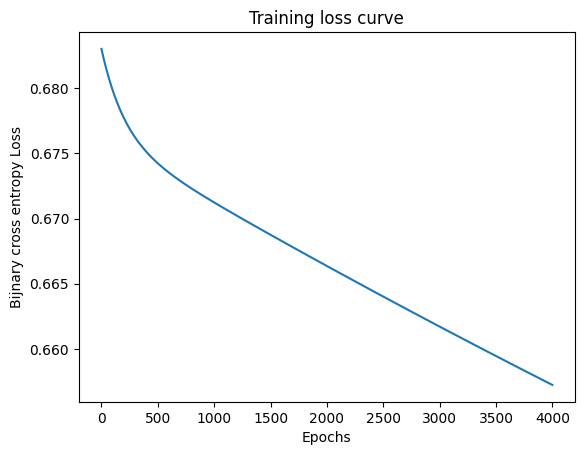

In [ ]:
diabetes =datasets.load_diabetes()
x=diabetes.data
y=diabetes.target
threshold=y.mean()
y=(y>threshold).astype(int)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

m,n=x_train.shape
w=np.zeros(n)+0.2  #or w=np.zero()+0.2
b=0
alpha=0.01
epochs=4000

def sigmoid(z):
  return 1/(1+np.exp(-z))

def binary_cross_entropy(y_true,y_pred):
  epsilon=1e-8 #to avoid log(0)
  return -np.mean(y_true*np.log(y_pred+epsilon)+(1-y_true)*np.log(1-y_pred+epsilon))

losses=[]
#alp=[0.01,0.05,1]

for epoch in range(epochs):
  z=np.dot(x_train,w)+b
  predictions=sigmoid(z)
  dw=(1/m)*np.dot(x_train.T,(predictions-y_train))
  db=(1/m)*np.sum(predictions-y_train)
  w-=alpha*dw
  b-=alpha*db
  loss=binary_cross_entropy(y_train,predictions)
  losses.append(loss)

  if(epoch%100==0):
    print(f"Epoch: {epoch}, Loss: {loss:.4f}")

z_test=np.dot(x_test,w)+b
y_pred=sigmoid(z_test)
y_pred_class=(y_pred>0.5).astype(int)

accuracy=np.mean(y_pred_class==y_test)
print(f"\nAccuracy: {accuracy*100:.4f}%")
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,y_pred_class))
print("Classification Report: \n",metrics.classification_report(y_test,y_pred_class))

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Bijnary cross entropy Loss")
plt.title("Training loss curve")
plt.show()

<h1>7. Naive Bayes Classifier </h1>

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import datasets
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#try:
 # df=pd.read_csv('titanic_csv')
#except:
df=sns.load_dataset('titanic')

features=['pclass','sex','age','class','adult_male','alone']
df=df[features+['survived']].copy()

df['age'].fillna(df['age'].median(),inplace=True)

#converting categorical values:
Le=LabelEncoder()
df['sex']=Le.fit_transform(df['sex'])
df['class']=Le.fit_transform(df['class'])
df['adult_male']=Le.fit_transform(df['adult_male'])
#df['alive']=Le.fit_transform(df['alive'])
df['alone']=Le.fit_transform(df['alone'])
x_train,x_test,y_train,y_test=train_test_split(df[features],df['survived'],test_size=0.6,random_state=0)
gnb=GaussianNB()
y_pred=gnb.fit(x_train,y_train).predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#Example Prediction
"""example=pd.DataFrame({
    'pclass':[1],
    'sex':[1],
    'age':[24],
    'class':[1],
    'adult_male':[1],
    'alive':[1],
    'alone':[0]
})
prediction=gnb.predict(example)
print("\nExample Prediction: ","SURVIVED" if prediction[0]==1 else "Did not Survive")"""

0.7644859813084112
[[257  84]
 [ 42 152]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       341
           1       0.64      0.78      0.71       194

    accuracy                           0.76       535
   macro avg       0.75      0.77      0.76       535
weighted avg       0.78      0.76      0.77       535



<ipython-input-14-a22d16dee485>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


'example=pd.DataFrame({\n    \'pclass\':[1],\n    \'sex\':[1],\n    \'age\':[24],\n    \'class\':[1],\n    \'adult_male\':[1],\n    \'alive\':[1],\n    \'alone\':[0]\n})\nprediction=gnb.predict(example)\nprint("\nExample Prediction: ","SURVIVED" if prediction[0]==1 else "Did not Survive")'

<h1>8. Artificial Neural Network </h1>

In [ ]:
from joblib.numpy_pickle_utils import xrange
from numpy import *

class NeuralNet(object):
    def __init__(self):
        # Generate random numbers
        random.seed(1)

        # Assign random weights to a 3 x 1 matrix,
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # Train the neural network and adjust the weights each time.
    def train(self, inputs, outputs, training_iterations):
        for iteration in xrange(training_iterations):
            # Pass the training set through the network.
            output = self.learn(inputs)

            # Calculate the error
            error = outputs - output

            # Adjust the weights by a factor
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output))
            self.synaptic_weights += factor

        # The neural network thinks.

    def learn(self, inputs):
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

if __name__ == "__main__":
    # Initialize
    neural_network = NeuralNet()

    # The training set.
    inputs = array([[0, 1, 1], [1, 0, 0], [1, 0, 1]])
    outputs = array([[1, 0, 1]]).T

    # Train the neural network
    neural_network.train(inputs, outputs, 10000)

    # Test the neural network with a test example.
    print(neural_network.learn(array([1, 0, 1])))

[0.9897704]


<h1>9. KNN Classifier</h1>

<h4>Without using Library</h4>

In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
x = iris_data.data
y = iris_data.target
print("name",iris_data.target_names)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

feature_means = np.mean(x_train, axis=0)
feature_stds = np.std(x_train, axis=0)

x_train_std = (x_train - feature_means) / feature_stds
x_test_std = (x_test - feature_means) / feature_stds

def knn_predict(x_train,y_train,x_test,k):
    predictions = []
    for test_point in x_test:
        distances = np.sqrt(np.sum((x_train - test_point)**2,axis=1))
        nearest_indices = np.argsort(distances)[:k]
        nearest_labels = y_train[nearest_indices]

        unique, counts = np.unique(nearest_labels, return_counts=True)
        prediction = unique[np.argmax(counts)]
        predictions.append(prediction)
    return np.array(predictions)
knn_predictions = knn_predict(x_train_std, y_train, x_test_std, k=3)
accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", accuracy)
print("knn_prediction: ", knn_predictions)
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,knn_predictions))
print("Classification Report: \n",metrics.classification_report(y_test,knn_predictions))

name ['setosa' 'versicolor' 'virginica']
Accuracy: 1.0
knn_prediction:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h4>Using Library</h4>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std, y_train)
sklearn_predictions = knn.predict(x_test_std)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)
print("Accuracy:", sklearn_accuracy)
print("sklearn_prediction: ", sklearn_predictions)
print("Confusion Matrix: \n",metrics.confusion_matrix(y_test,sklearn_predictions))
print("Classification Report: \n",metrics.classification_report(y_test,sklearn_predictions))

Accuracy: 1.0
sklearn_prediction:  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Confusion Matrix: 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<h1>10. Decision Tree Classification</h1>

Accuracy: 0.9666666666666667
Confusion Matrix: 
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



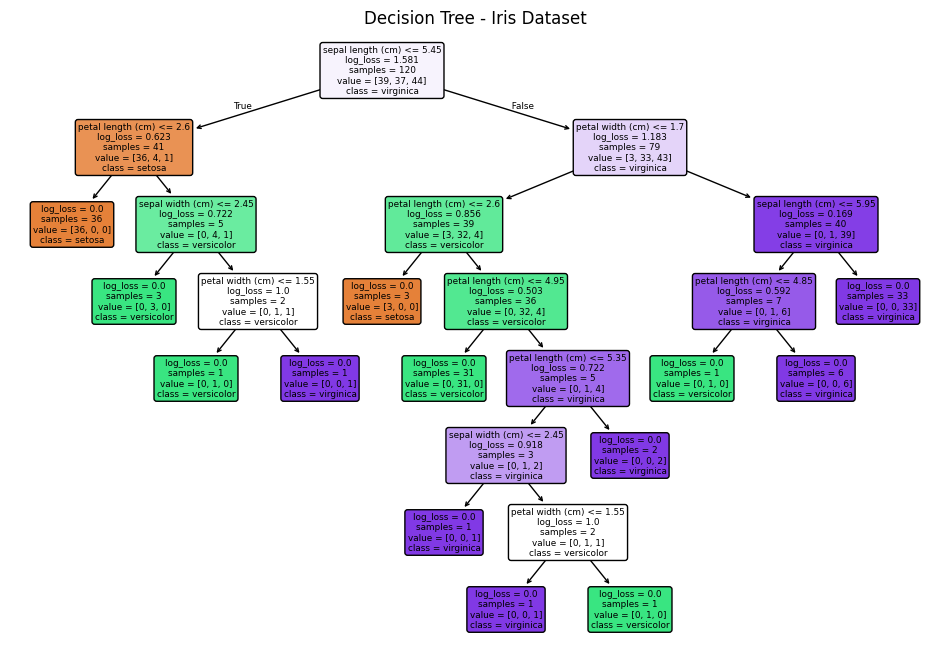

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
iris=datasets.load_iris()
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
clf=DecisionTreeClassifier(max_features=1,criterion= "log_loss")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
cm=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix: \n",cm)
print("Classification Report: \n",metrics.classification_report(y_test,y_pred))
plt.figure(figsize=(12, 8))
plot_tree(clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree - Iris Dataset")
plt.show()

<h1>11. SVM Classification</h1>

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score
)

# Load dataset
classification_data = load_breast_cancer()
X = pd.DataFrame(classification_data.data, columns=classification_data.feature_names)
y = pd.Series(classification_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

# Print results
print("SVM Classification Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

SVM Classification Metrics:
Accuracy: 0.9737
TP: 70, TN: 41, FP: 2, FN: 1
Recall: 0.9859
Specificity: 0.9535
F1 Score: 0.9790
AUC: 0.9974


<h1>12. K-means Clustering</h1>

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import mode

# Load dataset
clustering_data = load_breast_cancer()
X = pd.DataFrame(clustering_data.data, columns=clustering_data.feature_names)
y_true = pd.Series(clustering_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Map clusters to actual labels based on majority vote
mapped_labels = pd.Series(kmeans_labels)
mapping = {}
for cluster in [0, 1]:
    true_label = mode(y_true[mapped_labels == cluster], keepdims=True).mode[0]
    mapping[cluster] = true_label
mapped_preds = mapped_labels.map(mapping)

# Calculate metrics
conf_matrix = confusion_matrix(y_true, mapped_preds)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_true, mapped_preds)
recall = recall_score(y_true, mapped_preds)
precision = precision_score(y_true, mapped_preds)
specificity = TN / (TN + FP)
f1 = f1_score(y_true, mapped_preds)
auc = roc_auc_score(y_true, mapped_preds)

# Print results
print("K-Means Clustering with Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

K-Means Clustering with Metrics:
Accuracy: 0.9121
TP: 344, TN: 175, FP: 37, FN: 13
Recall: 0.9636
Specificity: 0.8255
F1 Score: 0.9322
AUC: 0.8945


<h1>13. Hierarchical Clustering</h1>

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Load dataset
clustering_data = load_breast_cancer()
X = pd.DataFrame(clustering_data.data, columns=clustering_data.feature_names)
y_true = pd.Series(clustering_data.target)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Map clusters to actual labels based on majority vote
mapped_labels = pd.Series(hierarchical_labels)
mapping = {}
for cluster in [0, 1]:
    true_label = mode(y_true[mapped_labels == cluster], keepdims=True).mode[0]
    mapping[cluster] = true_label
mapped_preds = mapped_labels.map(mapping)

# Calculate metrics
conf_matrix = confusion_matrix(y_true, mapped_preds)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(y_true, mapped_preds)
recall = recall_score(y_true, mapped_preds)
precision = precision_score(y_true, mapped_preds)
specificity = TN / (TN + FP)
f1 = f1_score(y_true, mapped_preds)
auc = roc_auc_score(y_true, mapped_preds)

# Print results
print("Hierarchical Clustering with Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Hierarchical Clustering with Metrics:
Accuracy: 0.8805
TP: 337, TN: 164, FP: 48, FN: 20
Recall: 0.9440
Specificity: 0.7736
F1 Score: 0.9084
AUC: 0.8588


<h1> EXTRA

In [1]:
import random
import numpy as np

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def initialize_centroids(points, k):
    # Randomly choose k points as initial centroids
    return points[random.sample(range(len(points)), k)]

def assign_clusters(points, centroids):
    clusters = [[] for _ in centroids]
    for point in points:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster_idx = np.argmin(distances)
        clusters[cluster_idx].append(point)
    return clusters

def update_centroids(clusters):
    return [np.mean(cluster, axis=0) if len(cluster) > 0 else np.zeros_like(clusters[0][0]) for cluster in clusters]

def has_converged(old_centroids, new_centroids, tol=1e-4):
    distances = [euclidean_distance(old, new) for old, new in zip(old_centroids, new_centroids)]
    return all(dist < tol for dist in distances)

def k_means(points, k, max_iterations=100):
    points = np.array(points)
    centroids = initialize_centroids(points, k)

    for _ in range(max_iterations):
        clusters = assign_clusters(points, centroids)
        new_centroids = update_centroids(clusters)

        if has_converged(centroids, new_centroids):
            break

        centroids = new_centroids

    # Return cluster assignment and centroids
    labels = np.zeros(len(points))
    for cluster_idx, cluster in enumerate(clusters):
        for point in cluster:
            point_idx = np.where((points == point).all(axis=1))[0][0]
            labels[point_idx] = cluster_idx
    return labels, centroids

# Example usage
if __name__ == "__main__":
    # Sample 2D data
    data = np.array([
        [1, 2], [1.5, 1.8], [5, 8],
        [8, 8], [1, 0.6], [9, 11],
        [8, 2], [10, 2], [9, 3]
    ])
    k = 3
    labels, centroids = k_means(data, k)
    print("Labels:", labels)
    print("Centroids:", centroids)


Labels: [2. 2. 1. 1. 2. 1. 0. 0. 0.]
Centroids: [array([9.        , 2.33333333]), array([7.33333333, 9.        ]), array([1.16666667, 1.46666667])]


In [2]:
import numpy as np
from collections import Counter

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = [self._predict(x) for x in X_test]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances to all training points
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Get the indices of the k closest neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbors
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)

# Example usage
if __name__ == "__main__":
    # Simple 2D dataset
    X_train = [[1, 2], [2, 3], [3, 3], [6, 5], [7, 7], [8, 6]]
    y_train = [0, 0, 0, 1, 1, 1]
    X_test = [[1.5, 2.5], [7, 6]]

    knn = KNN(k=3)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)

    print("Predictions:", predictions)



Predictions: [0 1]


In [3]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(np.array(X), np.array(y))

    def _gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        prob_sq = (counts / counts.sum()) ** 2
        return 1 - np.sum(prob_sq)

    def _best_split(self, X, y):
        best_gain = 0
        split_idx, split_thresh = None, None
        n_features = X.shape[1]
        parent_gini = self._gini(y)

        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_mask = X[:, feature_index] <= threshold
                right_mask = ~left_mask
                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                y_left, y_right = y[left_mask], y[right_mask]
                gini_left = self._gini(y_left)
                gini_right = self._gini(y_right)
                weighted_gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)

                gain = parent_gini - weighted_gini

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_index
                    split_thresh = threshold
        return split_idx, split_thresh

    def _build_tree(self, X, y, depth=0):
        if len(np.unique(y)) == 1:
            return {'label': y[0]}
        if self.max_depth is not None and depth >= self.max_depth:
            most_common = np.bincount(y).argmax()
            return {'label': most_common}

        split_idx, split_thresh = self._best_split(X, y)
        if split_idx is None:
            most_common = np.bincount(y).argmax()
            return {'label': most_common}

        left_mask = X[:, split_idx] <= split_thresh
        right_mask = ~left_mask
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        return {
            'feature_index': split_idx,
            'threshold': split_thresh,
            'left': left_tree,
            'right': right_tree
        }

    def predict(self, X):
        return [self._predict(inputs, self.tree) for inputs in np.array(X)]

    def _predict(self, x, node):
        if 'label' in node:
            return node['label']
        if x[node['feature_index']] <= node['threshold']:
            return self._predict(x, node['left'])
        else:
            return self._predict(x, node['right'])

# Example usage
if __name__ == "__main__":
    X_train = [
        [2.7, 2.5],
        [1.3, 1.5],
        [3.0, 3.5],
        [5.0, 5.5],
        [3.5, 2.2],
        [4.5, 4.0],
    ]
    y_train = [0, 0, 0, 1, 1, 1]

    clf = DecisionTree(max_depth=3)
    clf.fit(X_train, y_train)

    X_test = [[1.5, 2.0], [4.0, 4.5]]
    predictions = clf.predict(X_test)

    print("Predictions:", predictions)


Predictions: [np.int64(0), np.int64(1)]


In [4]:
import numpy as np

def euclidean_distance(a, b):
    return np.linalg.norm(a - b)

def compute_distance_matrix(points):
    n = len(points)
    dist_matrix = np.full((n, n), np.inf)
    for i in range(n):
        for j in range(i + 1, n):
            dist = euclidean_distance(points[i], points[j])
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    return dist_matrix

def hierarchical_clustering(points):
    points = np.array(points)
    clusters = [[i] for i in range(len(points))]
    distances = compute_distance_matrix(points)

    merge_history = []

    while len(clusters) > 1:
        # Find the two closest clusters
        min_dist = float('inf')
        pair = (None, None)

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dists = [euclidean_distance(points[p1], points[p2]) for p1 in clusters[i] for p2 in clusters[j]]
                linkage = min(dists)  # Single linkage
                if linkage < min_dist:
                    min_dist = linkage
                    pair = (i, j)

        i, j = pair
        new_cluster = clusters[i] + clusters[j]
        merge_history.append((clusters[i], clusters[j], min_dist))

        # Remove the old clusters and add the new one
        clusters.pop(max(i, j))
        clusters.pop(min(i, j))
        clusters.append(new_cluster)

    return merge_history

# Example usage
if __name__ == "__main__":
    data = np.array([
        [1, 2],
        [1.5, 1.8],
        [5, 8],
        [8, 8],
        [1, 0.6],
        [9, 11]
    ])

    history = hierarchical_clustering(data)
    for merge in history:
        print("Merged:", merge[0], "and", merge[1], "| Distance:", round(merge[2], 2))


Merged: [0] and [1] | Distance: 0.54
Merged: [4] and [0, 1] | Distance: 1.3
Merged: [2] and [3] | Distance: 3.0
Merged: [5] and [2, 3] | Distance: 3.16
Merged: [4, 0, 1] and [5, 2, 3] | Distance: 7.12


In [5]:
import numpy as np

class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        X = np.array(X)
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

# Example usage
if __name__ == "__main__":
    # Simple linearly separable data
    X_train = [[1, 2], [2, 3], [3, 3], [8, 8], [9, 10], [10, 9]]
    y_train = [0, 0, 0, 1, 1, 1]  # Class 0 vs Class 1

    # Convert labels to -1 and 1 for SVM
    y_train_svm = [1 if label == 1 else -1 for label in y_train]

    svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
    svm.fit(X_train, y_train_svm)

    X_test = [[2, 2], [9, 9]]
    predictions = svm.predict(X_test)
    print("Predictions:", predictions)  # Output: [-1, 1] → Class 0, Class 1


Predictions: [1. 1.]


In [6]:
import numpy as np

# Sigmoid activation and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        # Initialize weights
        self.w1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
        self.lr = learning_rate

    def forward(self, X):
        self.z1 = np.dot(X, self.w1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.w2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, output):
        m = X.shape[0]
        error = output - y  # MSE loss derivative

        d_z2 = error * sigmoid_derivative(output)
        d_w2 = np.dot(self.a1.T, d_z2) / m
        d_b2 = np.sum(d_z2, axis=0, keepdims=True) / m

        d_a1 = np.dot(d_z2, self.w2.T)
        d_z1 = d_a1 * sigmoid_derivative(self.a1)
        d_w1 = np.dot(X.T, d_z1) / m
        d_b1 = np.sum(d_z1, axis=0, keepdims=True) / m

        # Update weights
        self.w1 -= self.lr * d_w1
        self.b1 -= self.lr * d_b1
        self.w2 -= self.lr * d_w2
        self.b2 -= self.lr * d_b2

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

# Example usage
if __name__ == "__main__":
    # Simple binary classification dataset (XOR)
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn.train(X, y, epochs=10000)

    preds = nn.predict(X)
    print("Predictions:\n", preds)


Predictions:
 [[0]
 [1]
 [1]
 [1]]


In [7]:
import numpy as np

class PolynomialRegression:
    def __init__(self, degree=2):
        self.degree = degree
        self.coefficients = None

    def _polynomial_features(self, X):
        # Expand X to [1, x, x^2, ..., x^degree]
        X = np.array(X)
        return np.hstack([X**i for i in range(self.degree + 1)])

    def fit(self, X, y):
        X_poly = self._polynomial_features(X)
        y = np.array(y).reshape(-1, 1)
        # Normal Equation: θ = (XᵀX)^(-1)Xᵀy
        self.coefficients = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y

    def predict(self, X):
        X_poly = self._polynomial_features(X)
        return X_poly @ self.coefficients

# Example usage
if __name__ == "__main__":
    # Sample data (1D input)
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([3, 6, 11, 18, 27])  # Fits roughly to y = x^2 + 2x

    model = PolynomialRegression(degree=2)
    model.fit(X, y)

    X_test = np.array([[6], [7]])
    predictions = model.predict(X_test)

    print("Predictions:", predictions.flatten())



Predictions: [38. 51.]


In [8]:
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = sigmoid(linear_model)

            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return sigmoid(linear_model)

    def predict(self, X):
        y_pred_proba = self.predict_proba(X)
        return [1 if i > 0.5 else 0 for i in y_pred_proba]

# Example usage
if __name__ == "__main__":
    # Example binary classification dataset
    X = np.array([[1, 2], [2, 3], [3, 5], [5, 7], [3, 1], [6, 4]])
    y = np.array([0, 0, 0, 1, 0, 1])

    clf = LogisticRegression(learning_rate=0.1, n_iters=1000)
    clf.fit(X, y)

    X_test = np.array([[4, 5], [1, 1]])
    predictions = clf.predict(X_test)

    print("Predictions:", predictions)


Predictions: [1, 0]


In [9]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficient = None
        self.intercept = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Add bias term (column of 1s)
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])

        # Normal Equation: θ = (XᵀX)^(-1)Xᵀy
        theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        self.intercept = theta[0][0]
        self.coefficient = theta[1:]

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.coefficient) + self.intercept

# Example usage
if __name__ == "__main__":
    # Sample 1D data: y = 2x + 1
    X = np.array([[1], [2], [3], [4], [5]])
    y = np.array([3, 5, 7, 9, 11])

    model = LinearRegression()
    model.fit(X, y)

    X_test = np.array([[6], [7]])
    predictions = model.predict(X_test)
    print("Predictions:", predictions)


Predictions: [[13.]
 [15.]]


In [10]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.coefficients = None  # Includes both weights and bias

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)

        # Add bias (intercept) term — column of 1s
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])

        # Normal Equation: θ = (XᵀX)^(-1)Xᵀy
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    def predict(self, X):
        X = np.array(X)
        X_b = np.hstack([np.ones((X.shape[0], 1)), X])
        return X_b @ self.coefficients

# Example usage
if __name__ == "__main__":
    # X has 2 features: [feature1, feature2]
    X = [
        [1, 2],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 5]
    ]
    y = [5, 6, 15, 16, 20]  # y = 2*feature1 + 3*feature2

    model = LinearRegression()
    model.fit(X, y)

    X_test = [[6, 6], [3, 5]]
    predictions = model.predict(X_test)
    print("Predictions:", predictions.flatten())


Predictions: [25.4        15.73333333]


In [11]:
import numpy as np

class RidgeRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_param=1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param  # Regularization strength
        self.coefficients = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = X.shape

        self.coefficients = np.zeros((n_features, 1))

        for _ in range(self.n_iters):
            predictions = X @ self.coefficients
            error = predictions - y

            # Gradient of the cost function with regularization
            gradients = (2 / n_samples) * (X.T @ error) + (2 * self.lambda_param * self.coefficients)
            self.coefficients -= self.lr * gradients

    def predict(self, X):
        X = np.array(X)
        return X @ self.coefficients

# Example usage
if __name__ == "__main__":
    # Multivariate data
    X = [
        [1, 2],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 5]
    ]
    y = [5, 6, 15, 16, 20]  # Example output

    model = RidgeRegression(learning_rate=0.01, n_iters=1000, lambda_param=0.1)
    model.fit(X, y)

    X_test = [[6, 6], [3, 5]]
    predictions = model.predict(X_test)
    print("Ridge Predictions:", predictions.flatten())


Ridge Predictions: [24.88479263 15.78989629]


In [12]:
import numpy as np

class LassoRegression:
    def __init__(self, learning_rate=0.01, n_iters=1000, lambda_param=0.1):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.lambda_param = lambda_param  # Regularization strength
        self.coefficients = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y).reshape(-1, 1)
        n_samples, n_features = X.shape

        self.coefficients = np.zeros((n_features, 1))

        for _ in range(self.n_iters):
            predictions = X @ self.coefficients
            error = predictions - y

            # Gradient of the cost function with regularization
            gradients = (2 / n_samples) * (X.T @ error) + self.lambda_param * np.sign(self.coefficients)
            self.coefficients -= self.lr * gradients

    def predict(self, X):
        X = np.array(X)
        return X @ self.coefficients

# Example usage
if __name__ == "__main__":
    # Multivariate data
    X = [
        [1, 2],
        [2, 1],
        [3, 4],
        [4, 3],
        [5, 5]
    ]
    y = [5, 6, 15, 16, 20]  # Example output

    model = LassoRegression(learning_rate=0.01, n_iters=1000, lambda_param=0.1)
    model.fit(X, y)

    X_test = [[6, 6], [3, 5]]
    predictions = model.predict(X_test)
    print("Lasso Predictions:", predictions.flatten())


Lasso Predictions: [24.97222222 15.64847299]
